<a href="https://colab.research.google.com/github/saitejakomaragiri/saitejakomaragiri/blob/main/project2_content_writing_twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SIMPtweet.csv to SIMPtweet.csv


In [ ]:
data = pd.read_csv('SIMPtweet.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1358692504825044994,1358692504825044994,2021-02-08 13:51:51 India Standard Time,2021-02-08,13:51:51,530,102692454,workinpersonaly,Manjunath M™‎​,NaN,@simplilearn I am writing to get PMP course co...,en,[],[],[],1,0,1,[],[],https://twitter.com/workinpersonaly/status/135...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1275417343192109057,1275417343192109057,2020-06-23 18:46:05 India Standard Time,2020-06-23,18:46:05,530,85995990,simplilearn,Simplilearn.com,NaN,#Content writing as a profession is extremely ...,en,[],['https://bit.ly/3evgHP4'],['https://pbs.twimg.com/media/EbMxUAYWkAAJFRi....,0,0,1,"['content', 'interview', 'writer']",[],https://twitter.com/simplilearn/status/1275417...,False,NaN,1,https://pbs.twimg.com/media/EbMxUAYWkAAJFRi.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1202453718941274112,1202453718941274112,2019-12-05 10:34:41 India Standard Time,2019-12-05,10:34:41,530,1151440996997054466,bambammedia1,BamBam Media,NaN,Content Marketing ROI | Content Marketing Tuto...,en,[],['https://www.youtube.com/watch?v=RLszfMJ90Ks'],['https://pbs.twimg.com/media/EK_5SPzWwAA7p6x....,0,1,3,"['copywriting', 'writing', 'creative', 'seo', ...",[],https://twitter.com/bambammedia1/status/120245...,False,NaN,1,https://pbs.twimg.com/media/EK_5SPzWwAA7p6x.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1165072121271181313,1165072121271181313,2019-08-24 06:53:34 India Standard Time,2019-08-24,06:53:34,530,989796377810087938,memozing,Memozing E-learning Network,NaN,https://t.co/rZMp8MGpY8 The Rule of Thumb for...,en,[],"['http://MemoZing.com', 'http://dlvr.it/RBnK6M']",['https://pbs.twimg.com/media/ECsq638UUAEf5pI....,0,0,0,[],[],https://twitter.com/MemoZing/status/1165072121...,False,NaN,1,https://pbs.twimg.com/media/ECsq638UUAEf5pI.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1157941173241225221,1157704453644066817,2019-08-04 14:37:43 India Standard Time,2019-08-04,14:37:43,530,1037080499318149120,twjstar41041538,Twój_stary,NaN,"@jestemder @justomaszewska ""Nikita Duggal - ho...",en,[],[],[],1,0,0,[],[],https://twitter.com/Twjstar41041538/status/115...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'justomaszewska', 'name': 'Ju...",NaN,NaN,NaN,NaN


In [ ]:
data.shape

(15, 36)

In [ ]:
# collecting only tweets from the given dataset

new_data = pd.DataFrame()
new_data['tweets'] = data['tweet'].copy()

new_data

,tweets
0,@simplilearn I am writing to get PMP course co...
1,#Content writing as a profession is extremely ...
2,Content Marketing ROI | Content Marketing Tuto...
3,https://t.co/rZMp8MGpY8 The Rule of Thumb for...
4,"@jestemder @justomaszewska ""Nikita Duggal - ho..."
5,@simplilearn @ContestAlert @contestmantra @Con...
6,@simplilearn My #2018CareerWish is to get cert...
7,@simplilearn My #2018CareerWish is to get cert...
8,@simplilearn @ContestAlert @contests2share @co...
9,@simplilearn @ContestAlert @contests2share @co...


In [ ]:
# function for cleaning the data

def cleantext(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\W*\d\w*', '', text)
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)

  return text

new_data['tweets'] = new_data['tweets'].apply(cleantext)

#show cleaned data 
new_data  



,tweets
0,simplilearn i am writing to get pmp course con...
1,content writing as a profession is extremely s...
2,content marketing roi content marketing tutor...
3,httpstcorzmp the rule of thumb for blog post ...
4,jestemder justomaszewska nikita duggal holds ...
5,simplilearn contestalert contestmantra contest...
6,simplilearn my is to get certified in content ...
7,simplilearn my is to get certified in content ...
8,simplilearn contestalert contests contestmantr...
9,simplilearn contestalert contests contestmantr...


In [ ]:
# creating  a function for subjectivity
def createsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# creating a function for polarity
def createpolarity(text):
  return TextBlob(text).sentiment.polarity

# creating subjectivity and polarity columns

new_data['subjectivity'] = new_data['tweets'].apply(createsubjectivity)   
new_data['polarity'] = new_data['tweets'].apply(createpolarity) 

new_data

,tweets,subjectivity,polarity
0,simplilearn i am writing to get pmp course con...,0.062500,0.000000
1,content writing as a profession is extremely s...,0.666667,0.125000
2,content marketing roi content marketing tutor...,1.000000,0.500000
3,httpstcorzmp the rule of thumb for blog post ...,0.650000,0.000000
4,jestemder justomaszewska nikita duggal holds ...,0.330000,0.070000
5,simplilearn contestalert contestmantra contest...,0.600000,0.700000
6,simplilearn my is to get certified in content ...,0.033333,0.016667
7,simplilearn my is to get certified in content ...,0.022222,0.011111
8,simplilearn contestalert contests contestmantr...,0.333333,0.333333
9,simplilearn contestalert contests contestmantr...,0.000000,0.000000


In [ ]:
# creating a function to check +ve , -ve & neutral comments

def createanalysis(score):
  if (score < 0):
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
      return 'Positive'

new_data['analysis'] = new_data['polarity'].apply(createanalysis)

# showing the dataset
new_data

,tweets,subjectivity,polarity,analysis
0,simplilearn i am writing to get pmp course con...,0.062500,0.000000,Neutral
1,content writing as a profession is extremely s...,0.666667,0.125000,Positive
2,content marketing roi content marketing tutor...,1.000000,0.500000,Positive
3,httpstcorzmp the rule of thumb for blog post ...,0.650000,0.000000,Neutral
4,jestemder justomaszewska nikita duggal holds ...,0.330000,0.070000,Positive
5,simplilearn contestalert contestmantra contest...,0.600000,0.700000,Positive
6,simplilearn my is to get certified in content ...,0.033333,0.016667,Positive
7,simplilearn my is to get certified in content ...,0.022222,0.011111,Positive
8,simplilearn contestalert contests contestmantr...,0.333333,0.333333,Positive
9,simplilearn contestalert contests contestmantr...,0.000000,0.000000,Neutral


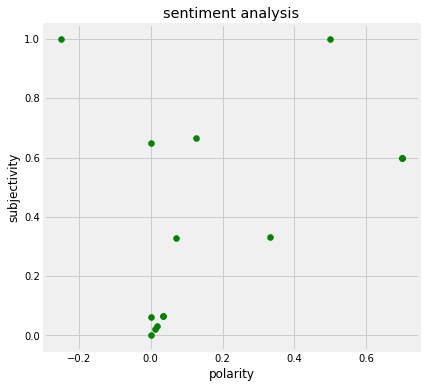

In [ ]:
# plotting a scatter plot 

plt.figure(figsize=(6,6))
for i in range(0, data.shape[0]):
  plt.scatter(new_data['polarity'][i], new_data['subjectivity'][i], color = 'Green')

plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentiment analysis')
plt.show()

# inference: most of the comments are on the positive polarity

In [ ]:
#number of positive , negative & neutral comments comments
poscomments = 0
neutralcomments = 0
negcomments = 0

for i in range (0, data.shape[0]):
  if (new_data['analysis'][i] == 'Positive'):
    poscomments = poscomments+1
  elif (new_data['analysis'][i] == 'Neutral'):
    neutralcomments = neutralcomments+1
  else :
      negcomments = negcomments+1

print('number of positive tweets :',poscomments)
print('number of neutral tweets :',neutralcomments)
print('number of negative tweets :',negcomments)   

number of positive tweets : 11
number of neutral tweets : 3
number of negative tweets : 1


In [ ]:
#number of positive , negative & neutral comments comments

print('percentage of positive comments :', round((poscomments/new_data.shape[0])*100, 1),'%')

print('percentage of neutral comments :', round((neutralcomments/new_data.shape[0])*100, 1),'%')

print('percentage of negative comments :', round((negcomments/new_data.shape[0])*100, 1),'%')

percentage of positive comments : 73.3 %
percentage of neutral comments : 20.0 %
percentage of negative comments : 6.7 %
